In [1]:
#import essential library
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Exploring the Data set

In [2]:
df = pd.read_csv("/content/drive/My Drive/glassdoor_jobs.csv")

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.tail()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom
955,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1


In [5]:
df.shape

(956, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [8]:
#information all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [9]:
#Statical description
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [10]:
#how to cheack null values
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [11]:
df.isnull().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
dtype: bool

#Data Cleaning

In [12]:
#Removing unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [15]:
# Removing the rows having '-1' as Salary Estimate value
print('Before',df.shape)
df = df[df['Salary Estimate'] !='-1']
print("After",df.shape)

Before (956, 14)
After (742, 14)


In [16]:
# Removing the text value from 'Salary Estimate' column
salary = df['Salary Estimate'].apply(lambda x:x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [17]:
#Removing '$' and 'K' from Salary estimate columns
salary = salary.apply(lambda x:x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [18]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  416


array(['84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ', '57-109 ',
       '136-208 ', '171-272 ', '65-126 ', '118-228 ', '113-182 ',
       '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ', '32-57 ',
       '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [19]:
# Creating column for 'Per Hour'
df['salary_per_hour'] = salary.apply(lambda x: 1 if "per hour" in x.lower() else 0)

In [20]:
df['salary_per_hour'].value_counts()

0    718
1     24
Name: salary_per_hour, dtype: int64

In [21]:
# Creating column for 'Employee Provided Salary'
df['emp_provided_salary'] = salary.apply(lambda x: 1 if "employer provided salary" in x.lower() else 0)

In [22]:
df['emp_provided_salary'].value_counts()

0    725
1     17
Name: emp_provided_salary, dtype: int64

In [23]:
# Removing 'Per Hour' and 'Employer Provided Salary' from 'Salary Estimate' column
salary = salary.apply(lambda x: x.lower().replace("per hour", "").replace("employer provided salary:", "").replace(" ",""))
salary.unique()[380:]

array(['84-153', '44-73', '40-87', '72-142', '74-137', '57-109',
       '136-208', '171-272', '65-126', '118-228', '113-182', '58-104',
       '58-108', '81-161', '115-220', '71-144', '32-57', '79-136',
       '48-113', '27-47', '68-125', '39-67', '71-135', '61-123', '87-141',
       '71-121', '72-121', '51-88', '101-141', '79-127', '81-132',
       '120-140', '65-113', '59-125', '80-142', '62-113'], dtype=object)

In [24]:
# Creating column for min_salary
df["min_salary"] = salary.apply(lambda x: int(x.split("-")[0]))
df["min_salary"].tail()

950    58
951    72
952    56
953    95
955    61
Name: min_salary, dtype: int64

In [25]:
#Creating column for max_salary
df['max_salary'] = salary.apply(lambda x: int(x.split('-')[1]))

In [26]:
df['max_salary'].head()

0     91
1    112
2     90
3     97
4    143
Name: max_salary, dtype: int64

In [27]:
#Creating column for average salary
df['average_salary'] = (df['min_salary']+df['max_salary'])/2

In [28]:
df['average_salary']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
950     84.5
951    102.5
952     73.5
953    127.5
955     93.5
Name: average_salary, Length: 742, dtype: float64

In [29]:
#Converting the hourly salaries to annual salaries
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['salary_per_hour'] == 1 else x['min_salary'],axis=1)

In [30]:
df['min_salary']

0      53
1      63
2      80
3      56
4      86
       ..
950    58
951    72
952    56
953    95
955    61
Name: min_salary, Length: 742, dtype: int64

In [31]:
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['salary_per_hour']==1 else ['max_salary'],axis=1)

In [32]:
df[df['salary_per_hour']==1][['salary_per_hour','min_salary','max_salary']]

,salary_per_hour,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [33]:
#Removing numbers from company name column
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])

In [34]:
df['Company Name'].head(10)

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
5                                 CyrusOne
6                       ClearOne Advantage
7                               Logic20/20
8                Rochester Regional Health
9                                 <intent>
Name: Company Name, dtype: object

In [35]:
#Creating a column 'job_state'
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df['job_state']

0       NM
1       MD
2       FL
3       WA
4       NY
      ... 
950     MA
951     TN
952     PA
953     PA
955     OH
Name: job_state, Length: 742, dtype: object

In [36]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [37]:
#fixing log analysis to CA
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'log angles'else'CA')

In [38]:
df['job_state'].value_counts()[:5]

CA    151
MA    103
NY     72
VA     41
IL     40
Name: job_state, dtype: int64

In [39]:
#Calculating age of the compnies
df['company_age'] = df['Founded'].apply(lambda x: x if x<1 else 2020-x)
df['company_age'].head()

0    47
1    36
2    10
3    55
4    22
Name: company_age, dtype: int64

In [40]:
# Cleaning the 'Job Description' column
df["python_job"] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df["r_job"] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df["spark_job"] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df["aws_job"] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df["excel_job"] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [41]:
#python jobs
df.python_job.value_counts()

1    392
0    350
Name: python_job, dtype: int64

In [42]:
#R_Jobs
df.r_job.value_counts()

0    741
1      1
Name: r_job, dtype: int64

In [43]:
#Excel jobs
df.excel_job.value_counts()

1    388
0    354
Name: excel_job, dtype: int64

In [44]:
df.aws_job.value_counts()

0    566
1    176
Name: aws_job, dtype: int64

In [45]:
df.spark_job.value_counts()

0    575
1    167
Name: spark_job, dtype: int64

In [46]:
#After Data sets
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,salary_per_hour,emp_provided_salary,min_salary,max_salary,average_salary,job_state,company_age,python_job,r_job,spark_job,aws_job,excel_job
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,[max_salary],72.0,NM,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,[max_salary],87.5,MD,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,[max_salary],85.0,FL,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,[max_salary],76.5,WA,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,[max_salary],114.5,NY,22,1,0,0,0,1


In [47]:
#Cleaning the 'Job Title' column
def title_simplifier(title):
  if 'data scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'analyst'
  elif 'machine learning engineer' in title.lower():
    return 'machine learning engineer'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'director' in title.lower():
    return 'director'
  else:
    return 'na'

In [48]:
df['job_title_simplified'] = df['Job Title'].apply(title_simplifier)

In [49]:
df.job_title_simplified.value_counts()

data scientist               279
na                           194
data engineer                119
analyst                      102
manager                       22
director                      14
machine learning engineer     12
Name: job_title_simplified, dtype: int64

In [50]:
def seniority(title):
  if 'senior' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
    return 'senior'
  elif 'junior' in title.lower() or 'jr' in title.lower():
    return 'jr'
  else:
    return 'na'

In [51]:
df['job_seniority'] = df['Job Title'].apply(seniority)

In [52]:
df['job_seniority'].value_counts()

na        519
senior    220
jr          3
Name: job_seniority, dtype: int64

In [53]:
# Cleaning 'Competitors' column
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: Competitors, Length: 742, dtype: int64

In [54]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  3
School / School District            2
-1                                  1
Unknown                             1
Name: Type of ownership, dtype: int64

In [55]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()):
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

In [56]:
df['Type of ownership'].value_counts()

Private                           410
Public                            193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [57]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64

In [58]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

In [59]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [60]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [61]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

In [62]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: Size, dtype: int64

In [63]:
# Dataset till now
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,salary_per_hour,emp_provided_salary,min_salary,max_salary,average_salary,job_state,company_age,python_job,r_job,spark_job,aws_job,excel_job,job_title_simplified,job_seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53,[max_salary],72.0,NM,47,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,63,[max_salary],87.5,MD,36,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,80,[max_salary],85.0,FL,10,1,0,1,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,56,[max_salary],76.5,WA,55,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,86,[max_salary],114.5,NY,22,1,0,0,0,1,data scientist,na


#Exploratory Data Analysis (EDA)

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
Competitors,742.0,1.053908,1.384239,0.0,0.0,0.0,3.0,4.0
salary_per_hour,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
emp_provided_salary,742.0,0.022911,0.149721,0.0,0.0,0.0,0.0,1.0
min_salary,742.0,74.719677,30.980593,15.0,52.0,69.5,91.0,202.0
average_salary,742.0,100.626011,38.855948,13.5,73.5,97.5,122.5,254.0
company_age,742.0,46.591644,53.778815,-1.0,11.0,24.0,59.0,276.0
python_job,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0
r_job,742.0,0.001348,0.036711,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Comapany Rating Histogram')

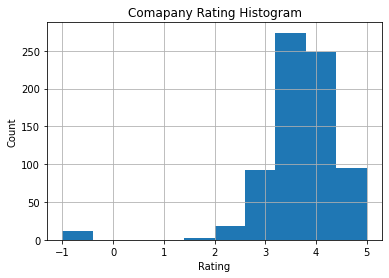

In [65]:
df['Rating'].hist()
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Comapany Rating Histogram")

Text(0.5, 1.0, 'Comapny Age Histogram')

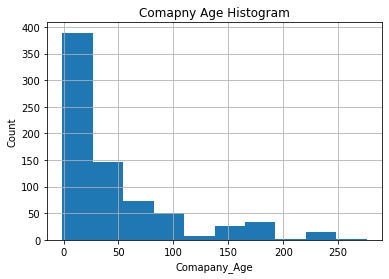

In [66]:
df['company_age'].hist()
plt.xlabel("Comapany_Age")
plt.ylabel("Count")
plt.title("Comapny Age Histogram")

Text(0.5, 1.0, 'Average Salary Histogram')

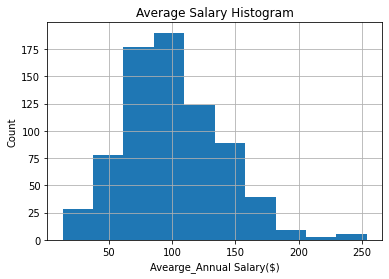

In [67]:
df['average_salary'].hist()
plt.xlabel("Avearge_Annual Salary($)")
plt.ylabel("Count")
plt.title("Average Salary Histogram")

#Box plot

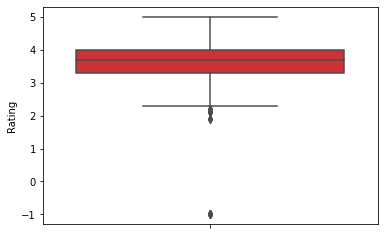

In [68]:
sns.boxplot(y='Rating',data=df,orient='v',palette='Set1')

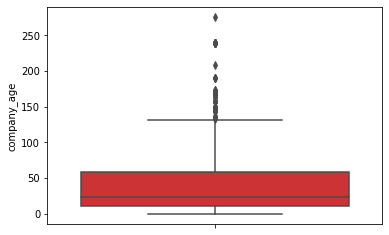

In [69]:
sns.boxplot(y='company_age',data=df,orient='v',palette='Set1')

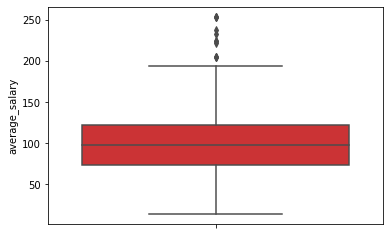

In [70]:
sns.boxplot(y='average_salary',data=df,orient='v',palette='Set1')

In [71]:
#finding correlation between columns
df[['Rating','company_age','average_salary']].corr()

,Rating,company_age,average_salary
Rating,1.000000,0.021655,0.013492
company_age,0.021655,1.000000,0.019655
average_salary,0.013492,0.019655,1.000000


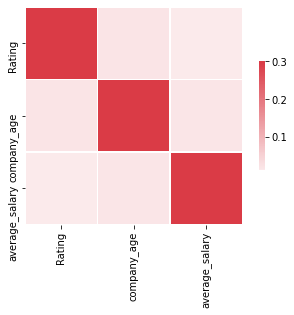

In [72]:
#Plotting the correlation
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Rating','company_age','average_salary']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [73]:
#Exploring Categorical data
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority'],
      dtype='object')

In [74]:
df_categorical = df[['Company Name', 'Location', 'Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
                     'job_title_simplified','job_seniority']]

Graph Location 
 total records = 20


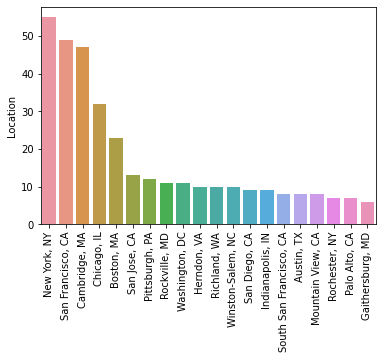

Graph Headquarters 
 total records = 20


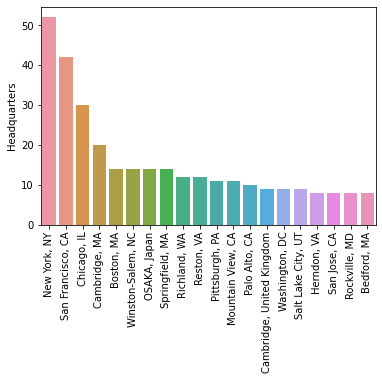

In [75]:
# Plotting the data for 'Location' and 'Headquarters' columns
for i in ['Location','Headquarters']:
  unique_categories = df_categorical[i].value_counts()[:20]
  print("Graph {} \n total records = {}".format(i,len(unique_categories)))
  chart = sns.barplot(x=unique_categories.index,y=unique_categories)
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
  plt.show()

Graph for Company Name 
 total records = 20


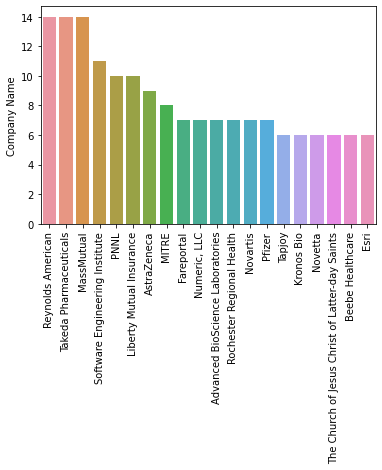

Graph for Size 
 total records = 8


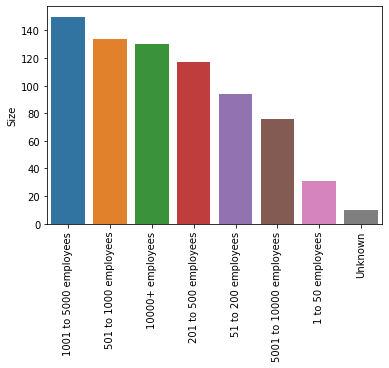

Graph for Type of ownership 
 total records = 9


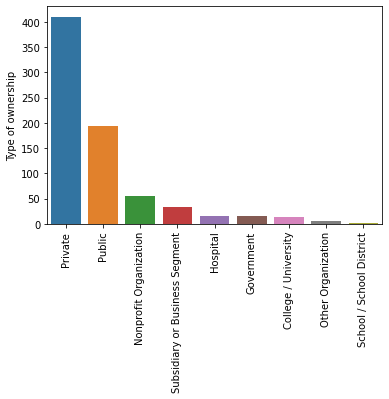

Graph for Revenue 
 total records = 13


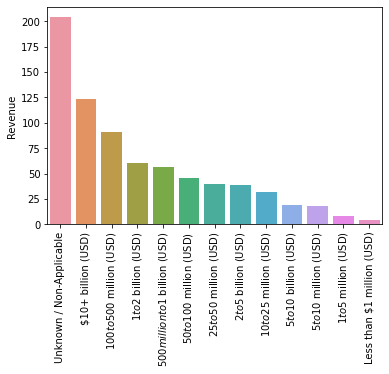

In [76]:
# Plotting the data for 'Company Name', 'Size', 'Type of ownership', 'Revenue' columns
for i in ['Company Name','Size','Type of ownership', 'Revenue']:
  unique_categories =  df_categorical[i].value_counts()[:20]
  print("Graph for {} \n total records = {}".format(i,len(unique_categories)))
  chart = sns.barplot(x=unique_categories.index, y=unique_categories)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

Graph forIndustry 
 total records 20:


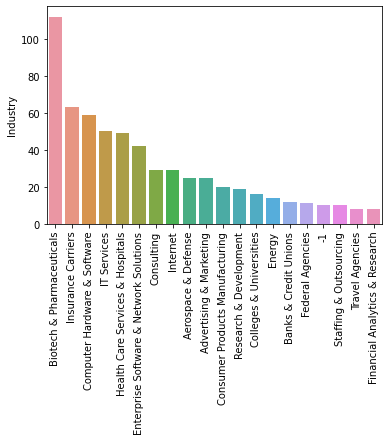

Graph forSector 
 total records 20:


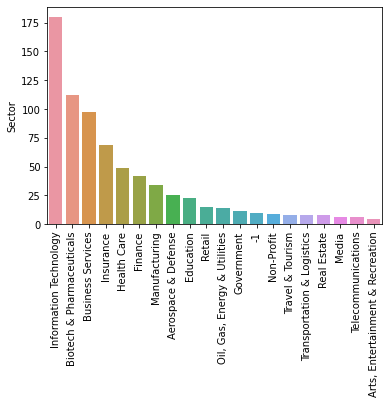

In [77]:
# Plotting the data for 'Industry', 'Sector' columns
for i in ['Industry','Sector']:
  unique_categories = df_categorical[i].value_counts()[:20]
  print("Graph for{} \n total records {}:".format(i,len(unique_categories)))
  chart = sns.barplot(x=unique_categories.index,y=unique_categories)
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
  plt.show()

Graph for job_title_simplified 
 Total records 7: 


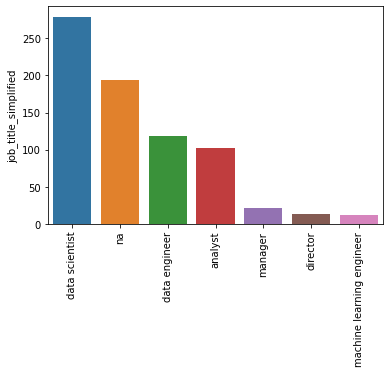

Graph for job_seniority 
 Total records 3: 


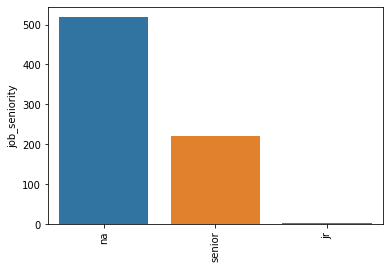

In [78]:
# Plotting the data for 'job_title_simplified', 'job_seniority' columns
for i in ['job_title_simplified','job_seniority']:
  unique_categories = df_categorical[i].value_counts()[:20]
  print("Graph for {} \n Total records {}: ".format(i,len(unique_categories)))
  chart = sns.barplot(x=unique_categories.index,y=unique_categories)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

In [79]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority'],
      dtype='object')

In [80]:
pd.pivot_table(df,index=['job_title_simplified','job_seniority'],values='average_salary')

average_salary
job_title_simplified      job_seniority                
analyst                   jr                  53.250000
                          na                  61.308219
                          senior              79.092593
data engineer             na                  96.701220
                          senior             124.689189
data scientist            jr                 106.500000
                          na                 107.043011
                          senior             138.956522
director                  na                 168.607143
machine learning engineer na                 119.958333
manager                   na                  84.022727
na                        na                  74.953846
                          senior             112.671875

In [81]:
pd.pivot_table(df,index=['job_state','job_title_simplified'],values='average_salary').sort_values('average_salary',
                                                                                                  ascending=False)[:20]

,,average_salary
job_state,job_title_simplified,
IL,director,221.750000
CA,machine learning engineer,163.500000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
CA,data engineer,129.540000
MO,data scientist,127.666667
NY,machine learning engineer,125.000000


In [82]:
pd.pivot_table(df,index='job_state',values='average_salary').sort_values('average_salary',ascending=False)[:20]

,average_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
Los Angeles,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


In [83]:
#Top 15 'Industries' for Data scientests
pd.pivot_table(df,index='Industry',values='average_salary').sort_values('average_salary',ascending=False)[:15] 

,average_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [84]:
#Top 10 Sectors for Data scientests
pd.pivot_table(df,index='Sector',values='average_salary').sort_values('average_salary',ascending=False)[:10]

,average_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,111.767857
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


In [85]:
#Top company types that pay for Data Scientest well
pd.pivot_table(df,index='Type of ownership',values='average_salary').sort_values('average_salary',ascending=False)[:10]

,average_salary
Type of ownership,
Public,110.893782
Subsidiary or Business Segment,110.573529
College / University,107.615385
Private,101.776829
Government,84.300000
Other Organization,77.900000
School / School District,77.750000
Nonprofit Organization,68.281818
Hospital,54.000000


In [86]:
#Top 20 Company Name pay for data scients job well
pd.pivot_table(df,index='Company Name',values='average_salary').sort_values('average_salary',ascending=False)[:20]

,average_salary
Company Name,
Gallup,237.5
Sage Intacct,232.5
CA-One Tech Cloud,225.0
Grand Rounds,221.5
Credit Sesame,205.0
The Climate Corporation,194.0
Grainger,179.5
Samsung Research America,177.0
Nektar Therapeutics,174.0


#Feature Engineering
#Trimming the columns

In [87]:
# Trimming the 'Industry' column
# Taking top 11 Industries and replacing others by 'Others'
industry_list = ['Biotech & Pharmaceuticals', 'Insurance Carriers', 'Computer Hardware & Software', 'IT Services', 'Health Care Services & Hospitals', 
                 'Enterprise Software & Network Solutions', 'Consulting', 'Internet', 'Advertising & Marketing', 'Aerospace & Defense', 'Consumer Products Manufacturing']

def industry_simplifier(text):
  if text not in industry_list:
    return 'Others'
  else:
    return text

df['Industry'] = df['Industry'].apply(industry_simplifier)

In [88]:
df['Industry'].tail()

950    Biotech & Pharmaceuticals
951                     Internet
952                       Others
953                       Others
955                       Others
Name: Industry, dtype: object

In [89]:
# Trimming the 'job_state' column
# Taking top 10 States and replacing others by 'Others'
job_state_list = ['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA']

def job_state_simplifier(text):
  if text not in job_state_list:
    return 'Others'
  else:
    return text

df['job_state'] = df['job_state'].apply(job_state_simplifier)

In [90]:
df['job_state'].head()

0    Others
1        MD
2    Others
3        WA
4        NY
Name: job_state, dtype: object

In [91]:
# Adding column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [92]:
df['job_in_headquarters'].head()

0    0
1    0
2    1
3    1
4    1
Name: job_in_headquarters, dtype: int64

In [93]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority', 'job_in_headquarters'],
      dtype='object')

In [94]:
# Choosing relevant columns
df_model = df.copy(deep=True)
df_model = df_model[['average_salary', 'Rating', 'company_age', 'Size', 'Type of ownership', 'Industry', 'Revenue', 'Competitors',
               'job_title_simplified', 'job_seniority', 'job_state', 'job_in_headquarters', 'python_job', 'spark_job', 'aws_job', 'excel_job', ]]

In [95]:
# Renaming columns
df_model.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Type of ownership':'type_of_ownership',
                         'Industry':'industry', 'Revenue':'revenue', 'Competitors':'competitors'}, inplace=True)

In [96]:
df_model.columns

Index(['average_salary', 'company_rating', 'company_age', 'company_size',
       'type_of_ownership', 'industry', 'revenue', 'competitors',
       'job_title_simplified', 'job_seniority', 'job_state',
       'job_in_headquarters', 'python_job', 'spark_job', 'aws_job',
       'excel_job'],
      dtype='object')

In [97]:
df_model['company_size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown'], dtype=object)

#Handling Ordinal Categorical Features

In [98]:
# Mapping ranks to 'company_size' columns since it is ordinal categorical feature
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df_model['company_size_rank'] = df_model['company_size'].map(size_map)
df_model.drop('company_size', axis=True, inplace=True)

In [99]:
# Mapping ranks to 'revenue	' columns since it is ordinal categorical feature
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11, '$10+ billion (USD)':12}

df_model['company_revenue_rank'] = df_model['revenue'].map(revenue_map)
df_model.drop('revenue', axis=True, inplace=True)

In [100]:
df['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [101]:
# Mapping ranks to 'job_seniority	' columns since it is ordinal categorical feature
job_seniority_map = {'na': 0, 'jr': 1, 'senior': 2}

df_model['job_seniority_rank'] = df_model['job_seniority'].map(job_seniority_map)
df_model.drop('job_seniority', axis=True, inplace=True)

#Handling Nomial Categrical features

In [102]:
# Removing 'type_of_ownership' column using get_dummies()
df_model = pd.get_dummies(columns=['type_of_ownership'], data=df_model)
df_model.shape

(742, 24)

In [103]:
#Removing 'industry' column using get_dummies
df_model = pd.get_dummies(columns=['industry'],data=df_model)
df_model.shape

(742, 35)

In [104]:
#Removing 'job_title_simplified' column using get_dummies()
df_model = pd.get_dummies(columns=['job_title_simplified'],data=df_model)
df_model.shape

(742, 41)

In [105]:
#Removing 'job_state' column using get_dummies()
df_model = pd.get_dummies(columns=['job_state'],data=df_model)
df_model.shape

(742, 51)

#Feature Scalling using MinMaxScaller

In [106]:
df_model.head()

,average_salary,company_rating,company_age,competitors,job_in_headquarters,python_job,spark_job,aws_job,excel_job,company_size_rank,company_revenue_rank,job_seniority_rank,type_of_ownership_College / University,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Other Organization,type_of_ownership_Private,type_of_ownership_Public,type_of_ownership_School / School District,type_of_ownership_Subsidiary or Business Segment,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Biotech & Pharmaceuticals,industry_Computer Hardware & Software,industry_Consulting,industry_Consumer Products Manufacturing,industry_Enterprise Software & Network Solutions,industry_Health Care Services & Hospitals,industry_IT Services,industry_Insurance Carriers,industry_Internet,industry_Others,job_title_simplified_analyst,job_title_simplified_data engineer,job_title_simplified_data scientist,job_title_simplified_director,job_title_simplified_machine learning engineer,job_title_simplified_manager,job_title_simplified_na,job_state_CA,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Others,job_state_PA,job_state_TX,job_state_VA,job_state_WA
0,72.0,3.8,47,0,0,1,0,0,1,4,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,87.5,3.4,36,0,0,1,0,0,0,7,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,85.0,4.8,10,0,1,1,1,0,1,4,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,76.5,3.8,55,3,1,1,0,0,0,5,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,114.5,2.9,22,3,1,1,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [107]:
df_model.shape

(742, 51)

In [108]:
X = df_model.drop('average_salary',axis=1)
y = df_model['average_salary']

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['company_rating', 'competitors', 'company_age', 'company_size_rank', 'company_revenue_rank']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [110]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
training_x, test_x, training_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set size: {} and Testing set size: {}".format(training_x.shape, test_x.shape))

Training set size: (593, 50) and Testing set size: (149, 50)


#Linear Regression Model

In [111]:
# Creating linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [112]:
# Fitting the dataset to the model
lr_model.fit(training_x, training_y)
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(round(lr_model.score(training_x, training_y),4)*100, round(lr_model.score(test_x, test_y),4)*100))

Accuracy of the Linear Regression Model on Training set is : 57.699999999999996% and on Test set is 58.93000000000001%


#Decision Tree Regression model

In [113]:
#Creating Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [114]:
#fitting the dataset into the model
dt_model.fit(training_x,training_y)
print("Accuracy of the Decision Tree Regression model on Training set is: {}% and on Test set is {}%".format(round(dt_model.score(training_x,training_y),4)*100,round(dt_model.score(test_x,test_y),4)*100))

Accuracy of the Decision Tree Regression model on Training set is: 99.41% and on Test set is 77.92999999999999%


#Random Forest Regression model

In [115]:
#Creating Random forest Regression 
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42)

In [116]:
#Fitting the data set into the model
rfr_model.fit(training_x,training_y)
print("Accuracy of RandomForestRegression model on Training set is: {}% and on Test set is: {}%".format(round(rfr_model.score(training_x,training_y),4)*100, round(rfr_model.score(test_x,test_y),4)*100))

Accuracy of RandomForestRegression model on Training set is: 95.26% and on Test set is: 76.44999999999999%
